### `---------------Mandatory Information to fill------------`

### Group ID: 134
### Group Members Name with Student ID:

| Student Name       | Student ID    | Contribution |
|--------------------|---------------|--------------|
| Chakshu            | 2023aa05280   | 100%         |
| Gali Jahnavi       | 2023aa05684   | 100%         |
| Aashaank Pratap    | 2023aa05023   | 100%         |
| Shivam Sahil       | 2023aa05663   | 100%         |


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [1]:
# Constants

epsilon = 0.1
alpha = 1  # Alpha value for initializing priors (if using Bayesian methods like Thompson Sampling)
beta = 1  # Beta value for initializing priors (similarly, if using Bayesian methods)
# These will be defined after loading and understanding the dataset
num_arms = None
value_function = None
policy = None


# Load Dataset

In [2]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
import pandas as pd

# Load Dataset
ctr_data = pd.read_csv(r'ctr_dataset.csv')

# Determine the number of unique arms
# Assuming each combination of 'Age', 'Gender', 'City', and 'Phone_OS' is a unique arm
ctr_data['arm_id'] = ctr_data.groupby(['Age', 'Gender', 'City', 'Phone_OS']).ngroup()
num_arms = ctr_data['arm_id'].nunique()

# Initialize value function and policy
value_function = [0.0] * num_arms  # Initial value estimates for each arm
policy = [1.0 / num_arms] * num_arms  # Uniform initial policy

# Print initialized values to verify
print("Number of Arms:", num_arms)
print("Initial value function:", value_function[:5])  # Show first 5 for brevity
print("Initial policy:", policy[:5])  # Show first 5 for brevity



Number of Arms: 780
Initial value function: [0.0, 0.0, 0.0, 0.0, 0.0]
Initial policy: [0.001282051282051282, 0.001282051282051282, 0.001282051282051282, 0.001282051282051282, 0.001282051282051282]


# Design a CTR Environment (1M)

In [4]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------
import numpy as np
class CTREnvironment:
    def __init__(self, data):
        self.data = data
        # Creating an index for easy access to arms
        self.data['arm_id'] = self.data.groupby(['Age', 'Gender', 'City', 'Phone_OS']).ngroup()
        self.num_arms = self.data['arm_id'].nunique()
        
        # Pre-compute probabilities for each arm
        self.probabilities = self._compute_probabilities()
        
    def _compute_probabilities(self):
        # Initialize probabilities dictionary
        probabilities = {}
        for arm in range(self.num_arms):
            # Filter data for each unique arm
            arm_data = self.data[self.data['arm_id'] == arm]
            # Calculate probability based on gender as a simple example
            # Assume that the probability of clicking is 0.7 for males and 0.6 for females
            p_click = (0.7 * (arm_data['Gender'] == 'Male').mean() +
                       0.6 * (arm_data['Gender'] == 'Female').mean())
            probabilities[arm] = p_click
        return probabilities
    
    def pull_arm(self, arm_id):
        # Generate a random number and compare with the stored probability to decide click (1) or no click (0)
        click = 1 if np.random.random() < self.probabilities[arm_id] else 0
        return click

    def reset(self):
        # This method can be used to reset any state in the environment, if necessary
        pass


# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [5]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

class RandomPolicy:
    def __init__(self, num_arms):
        self.num_arms = num_arms

    def select_arm(self):
        # Selects an arm at random
        return np.random.randint(0, self.num_arms)

def simulate_random_policy(environment, num_iterations=1000):
    random_policy = RandomPolicy(environment.num_arms)
    results = []
    
    for i in range(num_iterations):
        # Select an arm using the random policy
        selected_arm = random_policy.select_arm()
        # Pull the selected arm
        reward = environment.pull_arm(selected_arm)
        # Save the result
        results.append((i, selected_arm, reward))
        # Print the result
        print(f"Iteration {i+1}: Arm {selected_arm} was selected, Reward: {'Click' if reward == 1 else 'No Click'}")
    
    return results

# Assuming ctr_data is loaded and CTREnvironment is defined and instantiated
environment = CTREnvironment(ctr_data)
simulate_random_policy(environment)


Iteration 1: Arm 651 was selected, Reward: Click
Iteration 2: Arm 725 was selected, Reward: Click
Iteration 3: Arm 150 was selected, Reward: No Click
Iteration 4: Arm 251 was selected, Reward: No Click
Iteration 5: Arm 563 was selected, Reward: Click
Iteration 6: Arm 583 was selected, Reward: Click
Iteration 7: Arm 349 was selected, Reward: Click
Iteration 8: Arm 408 was selected, Reward: Click
Iteration 9: Arm 631 was selected, Reward: Click
Iteration 10: Arm 713 was selected, Reward: No Click
Iteration 11: Arm 598 was selected, Reward: No Click
Iteration 12: Arm 455 was selected, Reward: Click
Iteration 13: Arm 461 was selected, Reward: Click
Iteration 14: Arm 526 was selected, Reward: No Click
Iteration 15: Arm 199 was selected, Reward: Click
Iteration 16: Arm 569 was selected, Reward: No Click
Iteration 17: Arm 422 was selected, Reward: Click
Iteration 18: Arm 379 was selected, Reward: Click
Iteration 19: Arm 743 was selected, Reward: Click
Iteration 20: Arm 305 was selected, Rewar

[(0, 651, 1),
 (1, 725, 1),
 (2, 150, 0),
 (3, 251, 0),
 (4, 563, 1),
 (5, 583, 1),
 (6, 349, 1),
 (7, 408, 1),
 (8, 631, 1),
 (9, 713, 0),
 (10, 598, 0),
 (11, 455, 1),
 (12, 461, 1),
 (13, 526, 0),
 (14, 199, 1),
 (15, 569, 0),
 (16, 422, 1),
 (17, 379, 1),
 (18, 743, 1),
 (19, 305, 0),
 (20, 745, 0),
 (21, 110, 1),
 (22, 185, 0),
 (23, 409, 1),
 (24, 314, 1),
 (25, 256, 1),
 (26, 584, 0),
 (27, 6, 1),
 (28, 283, 0),
 (29, 465, 1),
 (30, 714, 0),
 (31, 487, 1),
 (32, 384, 1),
 (33, 535, 1),
 (34, 172, 0),
 (35, 759, 0),
 (36, 207, 0),
 (37, 295, 1),
 (38, 220, 0),
 (39, 451, 0),
 (40, 322, 0),
 (41, 182, 1),
 (42, 422, 1),
 (43, 188, 0),
 (44, 288, 1),
 (45, 342, 0),
 (46, 537, 0),
 (47, 389, 1),
 (48, 303, 0),
 (49, 488, 0),
 (50, 349, 1),
 (51, 366, 1),
 (52, 461, 0),
 (53, 308, 0),
 (54, 655, 1),
 (55, 379, 1),
 (56, 191, 1),
 (57, 617, 1),
 (58, 372, 0),
 (59, 78, 1),
 (60, 522, 1),
 (61, 357, 1),
 (62, 553, 0),
 (63, 279, 1),
 (64, 79, 1),
 (65, 455, 1),
 (66, 18, 1),
 (67, 439,

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [6]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
class GreedyPolicy:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.estimated_rewards = [0.0] * num_arms
        self.arm_counts = [0] * num_arms

    def select_arm(self):
        # If all arms have been tried at least once, choose the one with the highest estimated reward
        if min(self.arm_counts) > 0:
            return np.argmax(self.estimated_rewards)
        # Otherwise, choose an arm that has not been tried yet
        else:
            return np.argmin(self.arm_counts)

    def update_estimates(self, arm, reward):
        # Update the count of times the arm has been pulled
        self.arm_counts[arm] += 1
        # Update the estimated reward for the arm using an incremental average
        n = self.arm_counts[arm]
        current_estimate = self.estimated_rewards[arm]
        new_estimate = current_estimate + (reward - current_estimate) / n
        self.estimated_rewards[arm] = new_estimate

def simulate_greedy_policy(environment, num_iterations=1000):
    greedy_policy = GreedyPolicy(environment.num_arms)
    results = []
    
    for i in range(num_iterations):
        # Select an arm using the greedy policy
        selected_arm = greedy_policy.select_arm()
        # Pull the selected arm
        reward = environment.pull_arm(selected_arm)
        # Update the policy with the new reward information
        greedy_policy.update_estimates(selected_arm, reward)
        # Save and print the result
        results.append((i, selected_arm, reward))
        print(f"Iteration {i+1}: Arm {selected_arm} was selected, Reward: {'Click' if reward == 1 else 'No Click'}")
    
    return results

# Assuming CTREnvironment is already instantiated as 'environment'
simulate_greedy_policy(environment)

Iteration 1: Arm 0 was selected, Reward: Click
Iteration 2: Arm 1 was selected, Reward: Click
Iteration 3: Arm 2 was selected, Reward: No Click
Iteration 4: Arm 3 was selected, Reward: Click
Iteration 5: Arm 4 was selected, Reward: No Click
Iteration 6: Arm 5 was selected, Reward: Click
Iteration 7: Arm 6 was selected, Reward: No Click
Iteration 8: Arm 7 was selected, Reward: Click
Iteration 9: Arm 8 was selected, Reward: Click
Iteration 10: Arm 9 was selected, Reward: Click
Iteration 11: Arm 10 was selected, Reward: Click
Iteration 12: Arm 11 was selected, Reward: Click
Iteration 13: Arm 12 was selected, Reward: Click
Iteration 14: Arm 13 was selected, Reward: Click
Iteration 15: Arm 14 was selected, Reward: No Click
Iteration 16: Arm 15 was selected, Reward: Click
Iteration 17: Arm 16 was selected, Reward: Click
Iteration 18: Arm 17 was selected, Reward: Click
Iteration 19: Arm 18 was selected, Reward: Click
Iteration 20: Arm 19 was selected, Reward: Click
Iteration 21: Arm 20 was se

[(0, 0, 1),
 (1, 1, 1),
 (2, 2, 0),
 (3, 3, 1),
 (4, 4, 0),
 (5, 5, 1),
 (6, 6, 0),
 (7, 7, 1),
 (8, 8, 1),
 (9, 9, 1),
 (10, 10, 1),
 (11, 11, 1),
 (12, 12, 1),
 (13, 13, 1),
 (14, 14, 0),
 (15, 15, 1),
 (16, 16, 1),
 (17, 17, 1),
 (18, 18, 1),
 (19, 19, 1),
 (20, 20, 1),
 (21, 21, 0),
 (22, 22, 1),
 (23, 23, 1),
 (24, 24, 1),
 (25, 25, 0),
 (26, 26, 0),
 (27, 27, 1),
 (28, 28, 1),
 (29, 29, 1),
 (30, 30, 1),
 (31, 31, 1),
 (32, 32, 0),
 (33, 33, 1),
 (34, 34, 1),
 (35, 35, 1),
 (36, 36, 0),
 (37, 37, 0),
 (38, 38, 1),
 (39, 39, 1),
 (40, 40, 1),
 (41, 41, 0),
 (42, 42, 1),
 (43, 43, 1),
 (44, 44, 0),
 (45, 45, 1),
 (46, 46, 1),
 (47, 47, 0),
 (48, 48, 0),
 (49, 49, 1),
 (50, 50, 1),
 (51, 51, 1),
 (52, 52, 0),
 (53, 53, 1),
 (54, 54, 1),
 (55, 55, 1),
 (56, 56, 1),
 (57, 57, 1),
 (58, 58, 1),
 (59, 59, 0),
 (60, 60, 0),
 (61, 61, 0),
 (62, 62, 0),
 (63, 63, 0),
 (64, 64, 1),
 (65, 65, 1),
 (66, 66, 1),
 (67, 67, 0),
 (68, 68, 0),
 (69, 69, 0),
 (70, 70, 1),
 (71, 71, 0),
 (72, 72, 0)

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [7]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
import numpy as np

class UCBPolicy:
    def __init__(self, num_arms, total_counts=0):
        self.num_arms = num_arms
        self.estimated_rewards = [0.0] * num_arms
        self.arm_counts = [0] * num_arms
        self.total_counts = total_counts

    def select_arm(self):
        # Calculate UCB for each arm
        ucb_values = [0.0] * self.num_arms
        for arm in range(self.num_arms):
            if self.arm_counts[arm] == 0:
                # To ensure each arm is tried at least once
                return arm
            # Calculate UCB value
            bonus = np.sqrt((2 * np.log(self.total_counts)) / self.arm_counts[arm])
            ucb_values[arm] = self.estimated_rewards[arm] + bonus
        return np.argmax(ucb_values)

    def update_estimates(self, arm, reward):
        # Update the count of times the arm has been pulled
        self.arm_counts[arm] += 1
        self.total_counts += 1
        # Update the estimated reward for the arm using an incremental average
        n = self.arm_counts[arm]
        current_estimate = self.estimated_rewards[arm]
        new_estimate = current_estimate + (reward - current_estimate) / n
        self.estimated_rewards[arm] = new_estimate

def simulate_ucb_policy(environment, num_iterations=1000):
    ucb_policy = UCBPolicy(environment.num_arms)
    results = []
    
    for i in range(num_iterations):
        # Select an arm using the UCB policy
        selected_arm = ucb_policy.select_arm()
        # Pull the selected arm
        reward = environment.pull_arm(selected_arm)
        # Update the policy with the new reward information
        ucb_policy.update_estimates(selected_arm, reward)
        # Save and print the result
        results.append((i, selected_arm, reward))
        print(f"Iteration {i+1}: Arm {selected_arm} was selected, Reward: {'Click' if reward == 1 else 'No Click'}")
    
    return results

# Assuming CTREnvironment is already instantiated as 'environment'
simulate_ucb_policy(environment)


Iteration 1: Arm 0 was selected, Reward: No Click
Iteration 2: Arm 1 was selected, Reward: Click
Iteration 3: Arm 2 was selected, Reward: Click
Iteration 4: Arm 3 was selected, Reward: Click
Iteration 5: Arm 4 was selected, Reward: No Click
Iteration 6: Arm 5 was selected, Reward: No Click
Iteration 7: Arm 6 was selected, Reward: No Click
Iteration 8: Arm 7 was selected, Reward: Click
Iteration 9: Arm 8 was selected, Reward: No Click
Iteration 10: Arm 9 was selected, Reward: Click
Iteration 11: Arm 10 was selected, Reward: No Click
Iteration 12: Arm 11 was selected, Reward: Click
Iteration 13: Arm 12 was selected, Reward: No Click
Iteration 14: Arm 13 was selected, Reward: No Click
Iteration 15: Arm 14 was selected, Reward: No Click
Iteration 16: Arm 15 was selected, Reward: Click
Iteration 17: Arm 16 was selected, Reward: Click
Iteration 18: Arm 17 was selected, Reward: Click
Iteration 19: Arm 18 was selected, Reward: No Click
Iteration 20: Arm 19 was selected, Reward: Click
Iteration

[(0, 0, 0),
 (1, 1, 1),
 (2, 2, 1),
 (3, 3, 1),
 (4, 4, 0),
 (5, 5, 0),
 (6, 6, 0),
 (7, 7, 1),
 (8, 8, 0),
 (9, 9, 1),
 (10, 10, 0),
 (11, 11, 1),
 (12, 12, 0),
 (13, 13, 0),
 (14, 14, 0),
 (15, 15, 1),
 (16, 16, 1),
 (17, 17, 1),
 (18, 18, 0),
 (19, 19, 1),
 (20, 20, 1),
 (21, 21, 1),
 (22, 22, 0),
 (23, 23, 1),
 (24, 24, 1),
 (25, 25, 0),
 (26, 26, 1),
 (27, 27, 1),
 (28, 28, 1),
 (29, 29, 1),
 (30, 30, 1),
 (31, 31, 0),
 (32, 32, 1),
 (33, 33, 1),
 (34, 34, 1),
 (35, 35, 0),
 (36, 36, 1),
 (37, 37, 1),
 (38, 38, 1),
 (39, 39, 1),
 (40, 40, 0),
 (41, 41, 1),
 (42, 42, 0),
 (43, 43, 0),
 (44, 44, 0),
 (45, 45, 1),
 (46, 46, 1),
 (47, 47, 0),
 (48, 48, 1),
 (49, 49, 1),
 (50, 50, 0),
 (51, 51, 0),
 (52, 52, 1),
 (53, 53, 0),
 (54, 54, 0),
 (55, 55, 0),
 (56, 56, 0),
 (57, 57, 1),
 (58, 58, 1),
 (59, 59, 1),
 (60, 60, 1),
 (61, 61, 1),
 (62, 62, 1),
 (63, 63, 0),
 (64, 64, 1),
 (65, 65, 1),
 (66, 66, 0),
 (67, 67, 0),
 (68, 68, 1),
 (69, 69, 0),
 (70, 70, 1),
 (71, 71, 0),
 (72, 72, 1)

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

Iteration 1: Arm 278 was selected, Reward: No Click
Iteration 2: Arm 607 was selected, Reward: No Click
Iteration 3: Arm 616 was selected, Reward: Click
Iteration 4: Arm 281 was selected, Reward: No Click
Iteration 5: Arm 322 was selected, Reward: No Click
Iteration 6: Arm 471 was selected, Reward: Click
Iteration 7: Arm 716 was selected, Reward: Click
Iteration 8: Arm 98 was selected, Reward: Click
Iteration 9: Arm 763 was selected, Reward: Click
Iteration 10: Arm 625 was selected, Reward: No Click
Iteration 11: Arm 653 was selected, Reward: No Click
Iteration 12: Arm 163 was selected, Reward: No Click
Iteration 13: Arm 51 was selected, Reward: No Click
Iteration 14: Arm 754 was selected, Reward: Click
Iteration 15: Arm 447 was selected, Reward: Click
Iteration 16: Arm 167 was selected, Reward: Click
Iteration 17: Arm 203 was selected, Reward: No Click
Iteration 18: Arm 437 was selected, Reward: Click
Iteration 19: Arm 367 was selected, Reward: Click
Iteration 20: Arm 713 was selected

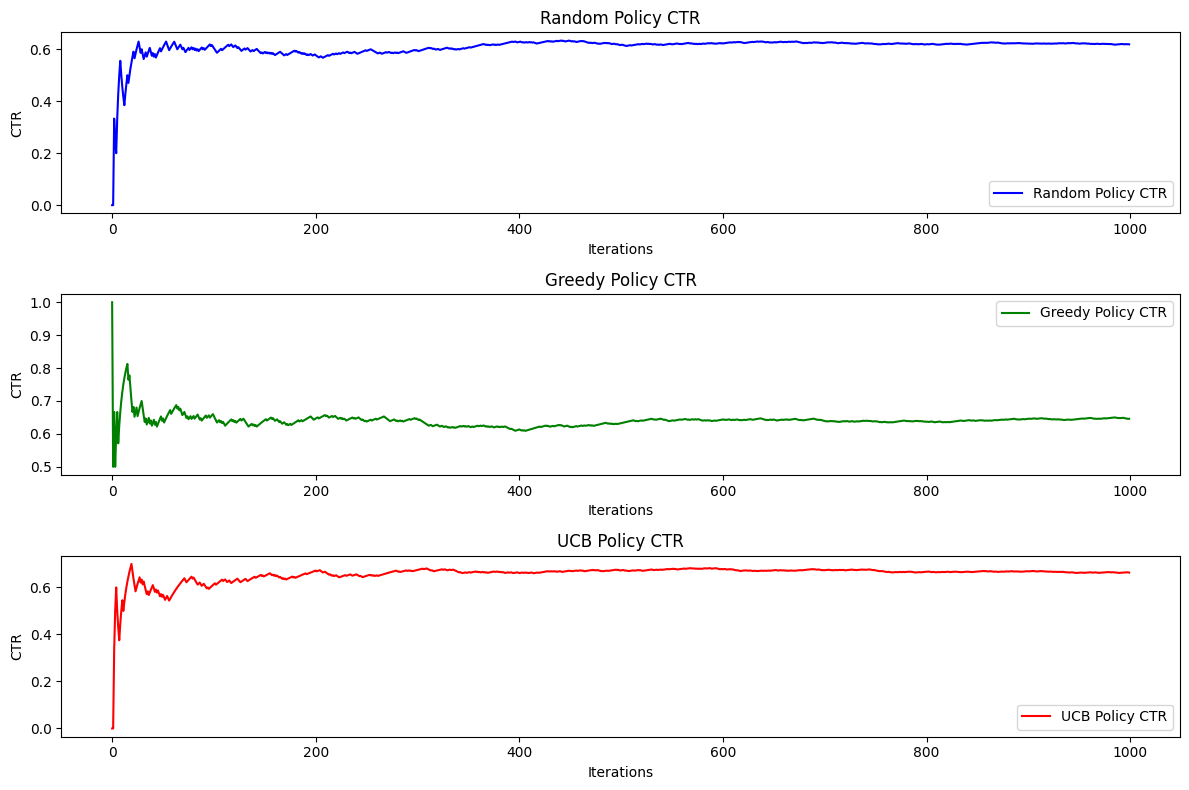

In [8]:
#-----write your code below this line--------
def compute_cumulative_ctr(rewards):
    cumulative_sums = np.cumsum(rewards)
    iterations = np.arange(1, len(rewards) + 1)
    ctrs = cumulative_sums / iterations
    return ctrs

# Example using the Random Policy
random_rewards = simulate_random_policy(environment, num_iterations=1000)
random_ctrs = compute_cumulative_ctr([reward for _, _, reward in random_rewards])

# Similarly for Greedy and UCB
greedy_rewards = simulate_greedy_policy(environment, num_iterations=1000)
greedy_ctrs = compute_cumulative_ctr([reward for _, _, reward in greedy_rewards])

ucb_rewards = simulate_ucb_policy(environment, num_iterations=1000)
ucb_ctrs = compute_cumulative_ctr([reward for _, _, reward in ucb_rewards])


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot for Random Policy
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(random_ctrs, label='Random Policy CTR', color='blue')
plt.xlabel('Iterations')
plt.ylabel('CTR')
plt.title('Random Policy CTR')
plt.legend()

# Plot for Greedy Policy
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(greedy_ctrs, label='Greedy Policy CTR', color='green')
plt.xlabel('Iterations')
plt.ylabel('CTR')
plt.title('Greedy Policy CTR')
plt.legend()

# Plot for UCB Policy
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(ucb_ctrs, label='UCB Policy CTR', color='red')
plt.xlabel('Iterations')
plt.ylabel('CTR')
plt.title('UCB Policy CTR')
plt.legend()

plt.tight_layout()
plt.show()

# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


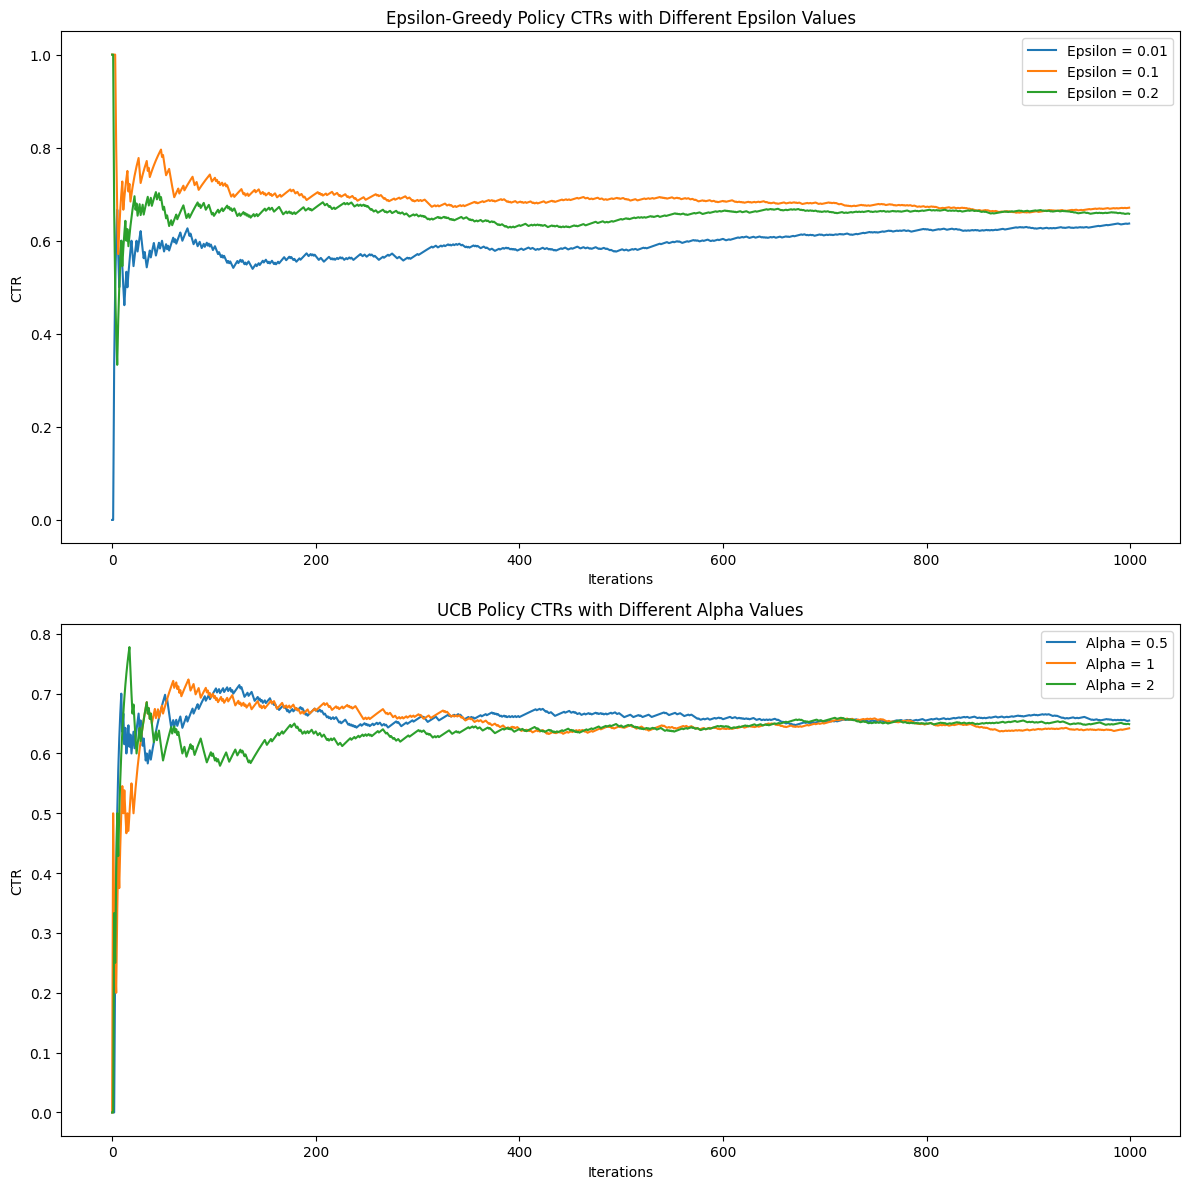

In [9]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha

class EpsilonGreedyPolicy:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.estimated_rewards = [0.0] * num_arms
        self.arm_counts = [0] * num_arms

    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(0, self.num_arms)
        return np.argmax(self.estimated_rewards)

    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        n = self.arm_counts[arm]
        current_estimate = self.estimated_rewards[arm]
        new_estimate = current_estimate + (reward - current_estimate) / n
        self.estimated_rewards[arm] = new_estimate

def simulate_epsilon_greedy(environment, num_iterations, epsilon):
    policy = EpsilonGreedyPolicy(environment.num_arms, epsilon)
    rewards = []
    
    for _ in range(num_iterations):
        arm = policy.select_arm()
        reward = environment.pull_arm(arm)
        policy.update_estimates(arm, reward)
        rewards.append(reward)
    return rewards

epsilons = [0.01, 0.1, 0.2]  # Different exploration rates
results_epsilon_greedy = {}
for eps in epsilons:
    rewards = simulate_epsilon_greedy(environment, 1000, eps)
    results_epsilon_greedy[eps] = compute_cumulative_ctr(rewards)

class UCBPolicy:
    def __init__(self, num_arms, alpha):
        self.num_arms = num_arms
        self.alpha = alpha
        self.estimated_rewards = [0.0] * num_arms
        self.arm_counts = [0] * num_arms
        self.total_counts = 0

    def select_arm(self):
        ucb_values = [0.0] * self.num_arms
        for arm in range(self.num_arms):
            if self.arm_counts[arm] == 0:
                return arm
            bonus = np.sqrt(self.alpha * np.log(self.total_counts) / self.arm_counts[arm])
            ucb_values[arm] = self.estimated_rewards[arm] + bonus
        return np.argmax(ucb_values)

    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        self.total_counts += 1
        n = self.arm_counts[arm]
        current_estimate = self.estimated_rewards[arm]
        new_estimate = current_estimate + (reward - current_estimate) / n
        self.estimated_rewards[arm] = new_estimate
alphas = [0.5, 1, 2]  # Different alpha values
results_ucb = {}

for alpha in alphas:
    policy = UCBPolicy(environment.num_arms, alpha)
    rewards = []
    for _ in range(1000):
        arm = policy.select_arm()
        reward = environment.pull_arm(arm)
        policy.update_estimates(arm, reward)
        rewards.append(reward)
    results_ucb[alpha] = compute_cumulative_ctr(rewards)
    
    

# Setup the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot results for different epsilon values in the Epsilon-Greedy policy
for eps, ctrs in results_epsilon_greedy.items():
    axs[0].plot(ctrs, label=f'Epsilon = {eps}')
axs[0].set_title('Epsilon-Greedy Policy CTRs with Different Epsilon Values')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('CTR')
axs[0].legend()

# Plot results for different alpha values in the UCB policy
for alpha, ctrs in results_ucb.items():
    axs[1].plot(ctrs, label=f'Alpha = {alpha}')
axs[1].set_title('UCB Policy CTRs with Different Alpha Values')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('CTR')
axs[1].legend()

plt.tight_layout()
plt.show()



# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

Based on the results illustrated in the graphs for the different Multi-Armed Bandit (MAB) strategies and the variations within those strategies, we can draw some conclusions about their effectiveness in optimizing Click-Through Rates (CTR) for digital ads.

## Summary of Observations:

### Random Policy:

The CTR under the random policy stabilizes at a lower level compared to the other strategies. This is expected as the random policy does not leverage past information to optimize ad selections.

### Greedy Policy:

The Greedy policy quickly reaches a higher CTR compared to the Random policy. It does so by exploiting the best-performing ad based on past interactions. However, this strategy may miss out on potentially better-performing ads that are less frequently chosen initially, as it does not explore sufficiently after the initial trials.

### UCB Policy:

The UCB policy shows a good balance between exploration and exploitation, as indicated by its performance. It starts exploring more aggressively than the Greedy policy, allowing for discovery of potentially better options before settling. This is visible from the relatively higher CTR compared to the Random policy, and in some configurations, it matches or surpasses the Greedy policy.

### Epsilon-Greedy Variations: 

The adjustments in the exploration rate (epsilon) show a clear impact on performance. Lower values of epsilon lead to more exploitation, which is beneficial if the best arm is known early. Higher values provide more exploration, potentially improving long-term outcomes by discovering better options that are initially less obvious.

### UCB with Different Alpha Values: 

Altering the alpha value in the UCB algorithm affects the confidence intervals used for exploration. Higher alpha values lead to more exploration (wider confidence intervals), which can be beneficial in environments where the rewards are highly variable or the optimal choices change over time.

## Conclusions:

The Greedy policy is effective in environments where the best choice is clear and remains consistent over time. However, it lacks the mechanism to explore after initial assessments, which could lead to suboptimal long-term performance if better options emerge or were not initially apparent.

The UCB policy is generally more robust, as it inherently balances exploration with exploitation. This makes it suitable for environments with uncertainty or where the reward distributions of options are not well known initially.

The Epsilon-Greedy policy offers a tunable approach to balance between exploration and exploitation. Adjusting epsilon allows the algorithm to be tailored to specific environments — lower for more stable environments and higher for more dynamic or uncertain environments.

In practice, the choice of strategy and its parameters (like epsilon or alpha) should be based on the specific characteristics of the environment, such as the variability in ad performance and the rate at which the environment changes.

For maximizing the CTR effectively, it is recommended to use a strategy that incorporates both exploration and exploitation, like the UCB or an appropriately tuned Epsilon-Greedy policy. These strategies are more adaptable to changes in user preferences and the effectiveness of different ads over time.